In [18]:
###Figure S9
# ###load in haplotype frequency data frame
rm(list=ls())
load("hibag_himba_models.RData")
ls()
my_models[1]
load("unrelated_haps_frequency_just_class1.RData")

head(allele_freq_df)


[1] "my_models"

$A
$n.samp
[1] 361

$n.snp
[1] 1382

$sample.id
  [1] "1034" "1070" "1079" "1155" "1161" "1191" "2001" "2159" "2177" "2182"
 [11] "2196" "2223" "2300" "24"   "2601" "2914" "2917" "2943" "2954" "2977"
 [21] "2978" "2979" "2980" "2981" "2982" "2983" "2984" "2985" "2986" "2987"
 [31] "2990" "2991" "2992" "2993" "2995" "2996" "2997" "2998" "2999" "3000"
 [41] "3001" "3003" "3005" "3006" "3007" "3008" "3009" "3010" "3011" "3012"
 [51] "3013" "3014" "3015" "3016" "3017" "3018" "3019" "3020" "3022" "3023"
 [61] "3024" "3025" "3027" "3028" "3029" "3031" "3032" "3033" "3034" "3035"
 [71] "3036" "3037" "3038" "3039" "3040" "3041" "3042" "3043" "3044" "3045"
 [81] "3046" "3047" "3048" "3049" "3050" "3054" "3055" "3056" "3057" "3058"
 [91] "3060" "3061" "3065" "3066" "3069" "3070" "3071" "3072" "3077" "3078"
[101] "3080" "3081" "3082" "3083" "3085" "3086" "3087" "3088" "3089" "3090"
[111] "3092" "3093" "3096" "3097" "3098" "3099" "3100" "3101" "3102" "3103"
[121] "3108" "3109" "3110" "3111" "3113"

,Allele,Frequency
,<fct>,<int>
1,A30:02-C03:04-B15:10,23
2,A30:01-C17:01-B42:01,16
3,A30:02-C16:01-B45:01,12
4,A23:01-C07:01-B47:01,8
5,A23:01-C08:02-B41:01,8
6,A68:02-C04:01-B53:01,8


In [14]:
#load in sub-Saharan african haps frequency data
african_haps <- read.delim("african_haps.csv", sep=",", header=TRUE)
names(african_haps)[names(african_haps) == "SA.black"] <- "South African"
names(african_haps)[names(african_haps) == "Khomani"] <- "\u2021Khomani"

african_haps$X.1 <- gsub("A*", "", african_haps$X.1)
african_haps$X.2 <- gsub("B*", "", african_haps$X.2)
african_haps$X.3 <- gsub("C*", "", african_haps$X.3)
african_haps$X.1 <- gsub("\\*", "", african_haps$X.1)
african_haps$X.2 <- gsub("\\*", "", african_haps$X.2)
african_haps$X.3 <- gsub("\\*", "", african_haps$X.3)
african_haps$Allele <- paste0("A", african_haps$X.1, "-", "C", african_haps$X.3, "-", "B", african_haps$X.2)

head(african_haps)

,X,X.1,X.2,X.3,Baka,Mbuti,Hadza,Dogon,Fulani,Datooga,⋯,Chaouya,Luo,Tunisia,Kenyan,Nandi,Nyanza,Shona,Zambian,Zulu,Allele
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,01:01,07:05,07:01,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,0.002,NA,0.012,NA,A01:01-C07:01-B07:05
2,2,01:01,07:05,15:05,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,0.002,NA,NA,NA,A01:01-C15:05-B07:05
3,3,01:01,07:09,07:02,NA,NA,NA,NA,NA,0.031,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,A01:01-C07:02-B07:09
4,4,01:01,08:01,07:01,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,A01:01-C07:01-B08:01
5,5,01:01,08:01,07:02,NA,NA,NA,0.011,NA,0.063,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,A01:01-C07:02-B08:01
6,6,01:01,08:01,07:04,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,0.014,0.015,NA,NA,NA,A01:01-C07:04-B08:01


In [15]:
merged_df <- merge(
  x = allele_freq_df, 
  y = african_haps[, c("Allele", colnames(african_haps)[5:27])], 
  by = "Allele", 
  all.x = TRUE
)
head(merged_df)
#102 inds, 204 haps
merged_df$Himba = merged_df$Frequency/204


,Allele,Frequency,Baka,Mbuti,Hadza,Dogon,Fulani,Datooga,Iraqw,Nama,⋯,Lusaka,Chaouya,Luo,Tunisia,Kenyan,Nandi,Nyanza,Shona,Zambian,Zulu
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A30:02-C03:04-B15:10,23,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,0.015,NA,NA,NA,0.006,0.005,0.012,NA
2,A30:01-C17:01-B42:01,16,NA,NA,NA,0.136,NA,NA,NA,NA,⋯,0.116,0.029,0.048,NA,0.029,0.029,0.021,NA,0.116,0.067
3,A30:02-C16:01-B45:01,12,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,0.010,NA,0.015,NA,0.009,0.023,NA,0.017
4,A23:01-C07:01-B47:01,8,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,A23:01-C08:02-B41:01,8,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,A68:02-C04:01-B53:01,8,NA,NA,NA,0.011,NA,NA,0.1,NA,⋯,NA,NA,NA,NA,0.010,0.010,0.006,0.007,NA,NA


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '‡Khomani' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '‡Khomani' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '‡Khomani' in 'mbcsToSbcs': dot substituted for <a1>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '‡Khomani' in 'mbcsToSbcs': dot substituted for <e2>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '‡Khomani' in 'mbcsToSbcs': dot substituted for <80>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on '‡Khomani' in 'mbcsToSbcs': dot substituted for <a1>”


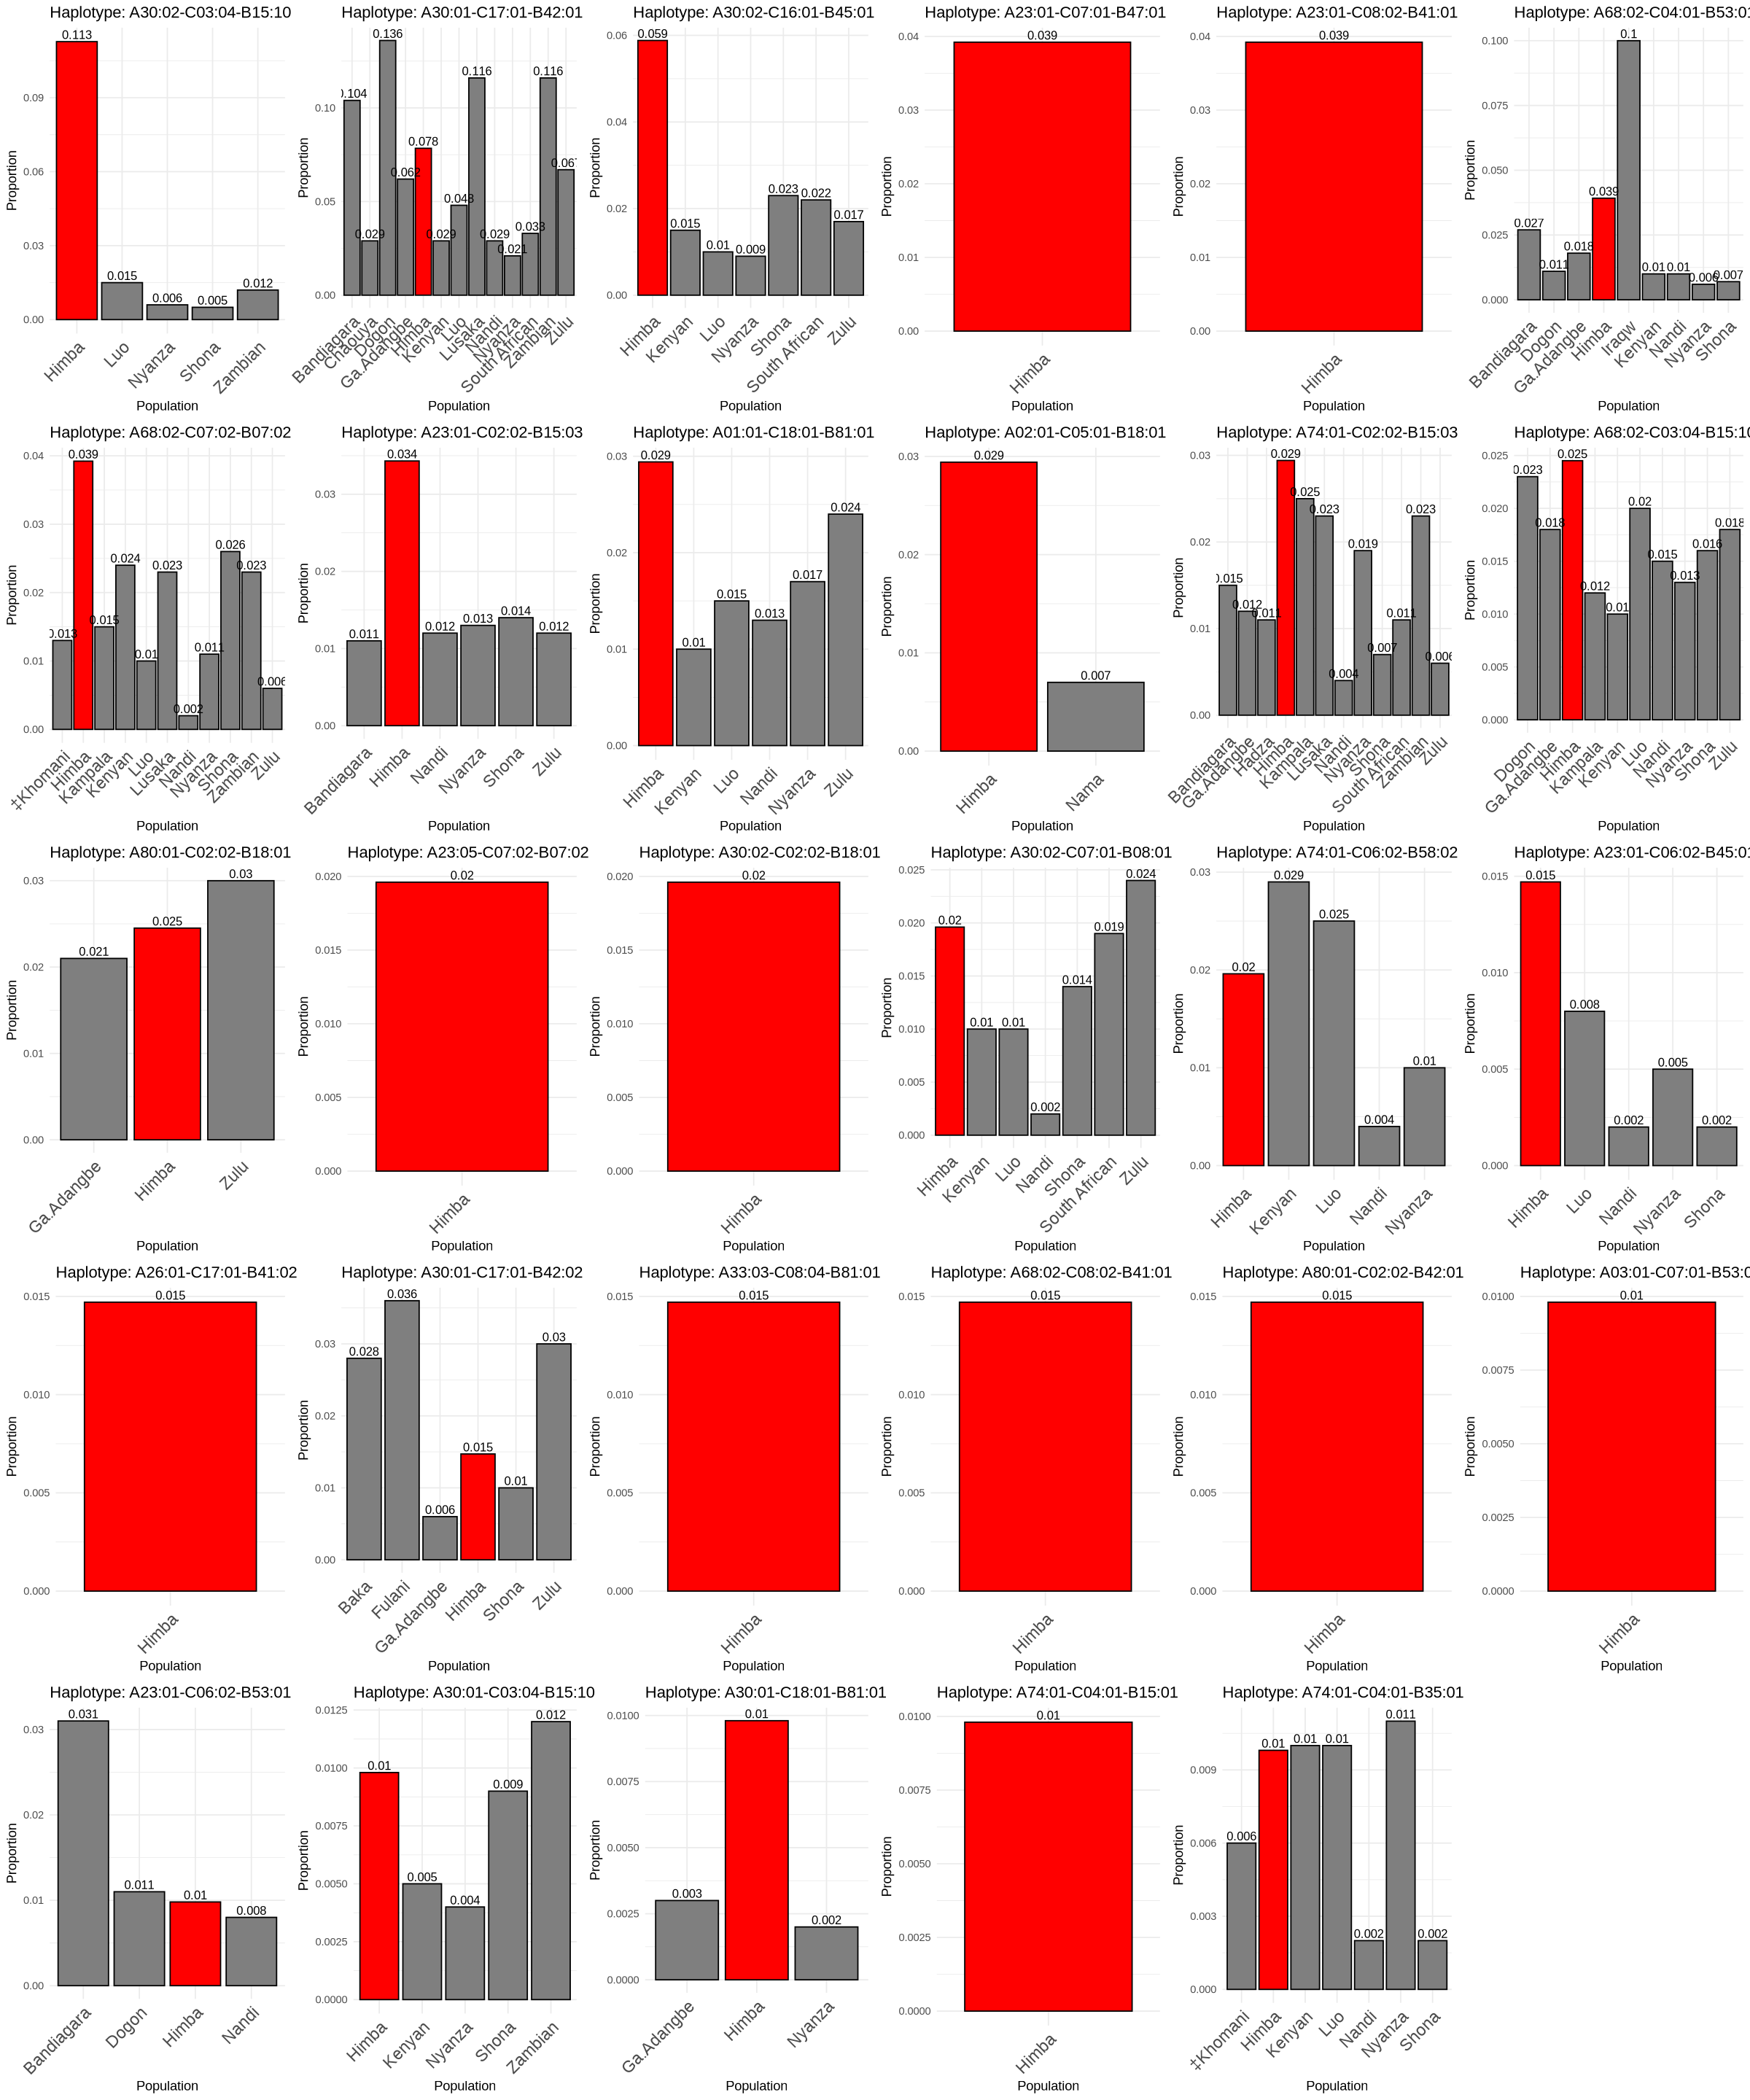

In [16]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(cowplot)

# Pivot the dataframe to long format
merged_df_long <- merged_df %>%
  pivot_longer(cols = -c(Allele, Frequency), 
               names_to = "Population", 
               values_to = "Proportion")

# Remove rows with NA values
merged_df_long <- merged_df_long %>%
  filter(!is.na(Proportion))

# Highlight Himba population
merged_df_long$Highlight <- ifelse(merged_df_long$Population == "Himba", "Himba_prop", "Other")
# Initialize an empty list to store plots
plot_list <- list()

library(ggplot2)
library(dplyr)
library(tidyr)
library(cowplot)
options(repr.plot.width = 20, repr.plot.height = 24)

# Pivot the dataframe to long format
merged_df_long <- merged_df %>%
  pivot_longer(cols = -c(Allele, Frequency), 
               names_to = "Population", 
               values_to = "Proportion")

# Remove rows with NA values
merged_df_long <- merged_df_long %>%
  filter(!is.na(Proportion))

# Highlight Himba population
merged_df_long$Highlight <- ifelse(merged_df_long$Population == "Himba", "Himba_prop", "Other")

# Initialize an empty list to store plots
plot_list <- list()

# Loop through each unique Allele
for (allele in unique(merged_df_long$Allele)) {
  # Filter for the specific Allele
  subset_df <- merged_df_long[merged_df_long$Allele == allele, ]
  
  # Generate bar plot for each allele with proportion on the y-axis and populations on the x-axis
  p <- ggplot(subset_df, aes(x = Population, y = Proportion, fill = Population)) +
    geom_bar(stat = "identity", color = "black", position = "dodge") +
    scale_fill_manual(values = c("Himba" = "red", "Other" = "grey")) + # Red color for Himba
    geom_text(aes(label = round(Proportion, 3)), vjust = -0.3, size = 3.5) + # Add labels with proportion
    labs(
      title = paste("Haplotype:", allele),
      x = "Population",
      y = "Proportion"
    ) +
    theme_minimal() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1, size=14)) # Remove legend and angle x labels
  
  # Add the plot to the list
  plot_list[[allele]] <- p
}

# Calculate the number of pages needed (since there are 69 plots, each page will have 9 plots)
n_pages <- ceiling(length(plot_list) / 30)

# Loop through pages and plot 9 plots per page
for (i in 1:n_pages) {
  # Select the subset of plots for the current page
  start_idx <- (i - 1) * 30 + 1
  end_idx <- min(i * 30, length(plot_list))
  
  # Get the plots for this page
  page_plots <- plot_list[start_idx:end_idx]
  
  # Combine the plots for this page
  combined_plot <- plot_grid(plotlist = page_plots, ncol = 6, nrow = 5)
  
  # Display the combined plot for this page
  print(combined_plot)
}
